In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [4]:
baseball = pd.read_csv("stlcardinals.csv")
baseball

,wins,attend
0,93,1170546
1,93,1143294
2,80,1241201
3,83,1712980
4,101,2090145
5,97,2011167
6,87,1682783
7,76,1629736
8,90,1604671
9,75,1196894


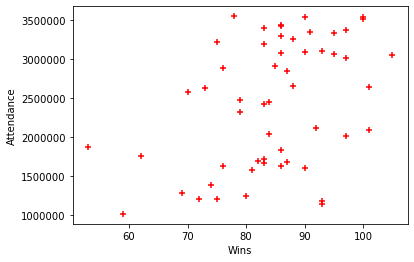

In [5]:
# Importing the dataset
%matplotlib inline
plt.xlabel('Wins')
plt.ylabel('Attendance')
plt.scatter(baseball.wins,baseball.attend, color='red', marker='+')


In [6]:
new_wins = baseball.drop('attend',axis='columns')
new_wins

,wins
0,93
1,93
2,80
3,83
4,101
5,97
6,87
7,76
8,90
9,75


In [7]:
new_attend = baseball.attend
new_attend

0     1170546
1     1143294
2     1241201
3     1712980
4     2090145
5     2011167
6     1682783
7     1629736
8     1604671
9     1196894
10    1574046
11    1838413
12    1695270
13    1207079
14    1659287
15    1278215
16    1627256
17    1385147
18    1010247
19    2111906
20    2317914
21    2037448
22    2637563
23    2471974
24    3072122
25    2892799
26    3080980
27    2573225
28    2448699
29    2418483
30    2844977
31    1866544
32    1756727
33    2654718
34    2634014
35    3195691
36    3225334
37    3336493
38    3109578
39    3011756
40    2910386
41    3048427
42    3538988
43    3407104
44    3552180
45    3432917
46    3343252
47    3301218
48    3093954
49    3262109
50    3369769
51    3540649
52    3520889
53    3444490
Name: attend, dtype: int64

In [8]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_wins,new_attend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.predict([[80]])

array([2284730.69864694])

In [10]:
reg.coef_

array([31774.07398002])

In [11]:
reg.intercept_

-257195.21975466097

In [12]:
reg.predict([[2500000]])

array([7.94349278e+10])

In [13]:
wins_list = pd.read_csv("predict-wins-groups.csv")
wins_list.head(3)

,wins
0,60
1,65
2,70


In [14]:
p = reg.predict(wins_list)
p

array([1649249.21904654, 1808119.58894664, 1966989.95884674,
       2125860.32874684, 2284730.69864694, 2443601.06854705,
       2602471.43844715, 2761341.80834725, 2920212.17824735,
       3079082.54814745])

In [15]:
wins_list['attend']=p
wins_list

,wins,attend
0,60,1.649249e+06
1,65,1.808120e+06
2,70,1.966990e+06
3,75,2.125860e+06
4,80,2.284731e+06
5,85,2.443601e+06
6,90,2.602471e+06
7,95,2.761342e+06
8,100,2.920212e+06
9,105,3.079083e+06


In [16]:
X = baseball["wins"].values.reshape(-1, 1)
y = baseball["attend"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (54, 1) (54, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"(RMSE): {rmse}")

Mean Squared Error (MSE): 590680513952.2277
R-squared (R2 ): 0.10358478684884531
(RMSE): 768557.4239783437


In [21]:
model.score(X_test, y_test)

0.10358478684884531

In [ ]:
wins_list.to_csv("prediction-stl-wins.csv")